In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
mp_df=pd.read_csv('Microsoft_data.csv')
mp_df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56751,01a3aaeba82aa3de04506d45fe2f8293,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1056.0,0,7.0,0,NaN,53447.0,...,63568.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
56752,01a3aef1a1af51ef3e4aa0a1c99bf8b6,win8defender,1.1.15100.1,4.18.1807.18075,1.273.689.0,0,7.0,0,NaN,41571.0,...,33211.0,1,0.0,0.0,0,0,0.0,1.0,1.0,1
56753,01a3af52c05b6af7d971d5f3092c3a80,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1454.0,0,7.0,0,NaN,53447.0,...,44032.0,0,NaN,0.0,0,0,0.0,1.0,11.0,0
56754,01a3b0c12114367eb99eaa2fac6b754c,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,43856.0,...,60903.0,0,0.0,0.0,0,0,0.0,0.0,8.0,1


In [3]:
mp_df.shape

(56756, 83)

In [4]:
y=mp_df['HasDetections']

In [5]:
mp_df.isnull().sum()

MachineIdentifier                             0
ProductName                                   0
EngineVersion                                 0
AppVersion                                    0
AvSigVersion                                  0
                                           ... 
Census_IsPenCapable                           0
Census_IsAlwaysOnAlwaysConnectedCapable     511
Wdft_IsGamer                               1931
Wdft_RegionIdentifier                      1931
HasDetections                                 0
Length: 83, dtype: int64

In [6]:
na_df=pd.DataFrame({'col_name':mp_df.columns,'na_pc':mp_df.isnull().sum()/mp_df.shape[0]*100})

na_df

,col_name,na_pc
MachineIdentifier,MachineIdentifier,0.000000
ProductName,ProductName,0.000000
EngineVersion,EngineVersion,0.000000
AppVersion,AppVersion,0.000000
AvSigVersion,AvSigVersion,0.000000
...,...,...
Census_IsPenCapable,Census_IsPenCapable,0.000000
Census_IsAlwaysOnAlwaysConnectedCapable,Census_IsAlwaysOnAlwaysConnectedCapable,0.900345
Wdft_IsGamer,Wdft_IsGamer,3.402283
Wdft_RegionIdentifier,Wdft_RegionIdentifier,3.402283


In [7]:
col_grt50pc_nas=list(na_df[na_df['na_pc']>50]['col_name'])

col_grt50pc_nas

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [8]:
#identifying the columns tp drop
cols_to_drop=[]
for col in mp_df.columns:
    if mp_df[col].nunique()==1 or mp_df[col].nunique()==mp_df.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop+=col_grt50pc_nas
cols_to_drop.append('HasDetections')
cols_to_drop

['MachineIdentifier',
 'IsBeta',
 'AutoSampleOptIn',
 'PuaMode',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_IsWIMBootEnabled',
 'DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'HasDetections']

In [9]:
mp_df.drop(columns=cols_to_drop,inplace=True)# dropping all the identified columns(from the above steps

In [10]:
cat_cols=[col for col in mp_df.columns if mp_df[col].dtype=='object']
con_cols=[col for col in mp_df.columns if mp_df[col].dtype=='int64' or mp_df[col].dtype=='float64']

print(cat_cols)
con_cols

['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


['RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsPortableOpera

In [11]:
#train-test split

X_train,X_test,Y_train,Y_test=train_test_split(mp_df,y,test_size=0.2,random_state=42)

In [12]:
#filling the missing values(mean for continuous variable,mode for continuous variable)

for col in con_cols:
    X_train[col].fillna(X_train[col].mean(),inplace=True)
    X_test[col].fillna(X_train[col].mean(),inplace=True)
    
for col in cat_cols:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    X_test[col].fillna(X_train[col].mode()[0],inplace=True)

In [13]:
#scaling the continuous variable

scaler=StandardScaler()
for col in con_cols:
    X_train[col]=scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=scaler.transform(np.array(X_test[col]).reshape(-1,1))

In [14]:
#encoding the categorical variables

oe_train=pd.get_dummies(X_train[cat_cols])
oe_test=pd.get_dummies(X_test[cat_cols])

In [15]:
oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1)

In [16]:
X_train_final=pd.concat([X_train[con_cols],oe_train_final],axis=1)
X_test_final=pd.concat([X_test[con_cols],oe_test_final],axis=1)

X_train_final


,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
5329,0.15376,-0.13587,0.397518,-0.621425,-0.122293,0.11405,-1.420443,-0.235400,4.556752e-01,1.203019,...,0,0,0,0,0,0,1,0,0,0
39862,0.15376,-0.13587,-2.864348,1.312866,-0.122293,0.11405,-1.070559,1.034914,-1.473825e+00,-1.321734,...,0,0,0,0,0,0,1,0,0,0
46411,0.15376,-0.13587,-2.864348,1.312866,-0.122293,0.11405,0.424402,-0.694570,4.957843e+00,-0.076189,...,0,0,0,0,0,0,1,0,0,0
31801,0.15376,-0.13587,1.066064,-0.621425,-0.122293,0.11405,0.996940,0.885350,4.556752e-01,0.462425,...,0,0,0,0,0,0,1,0,0,0
3693,0.15376,-0.13587,0.397518,-0.621425,-0.122293,0.11405,0.806094,0.791279,-1.473825e+00,0.271665,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.15376,-0.13587,0.397518,-0.621425,-0.122293,0.11405,-0.005002,-0.118061,7.616625e-16,1.203019,...,0,1,0,0,0,0,1,0,0,0
38158,0.15376,-0.13587,0.397518,-0.621425,-0.122293,0.11405,-0.450309,-0.226589,4.556752e-01,-0.771899,...,0,0,0,0,0,0,1,0,0,0
860,0.15376,-0.13587,-0.071740,1.312866,6.015958,0.11405,-1.261405,1.292797,-1.473825e+00,-1.512493,...,0,0,0,0,0,0,1,0,0,0
15795,0.15376,-0.13587,0.393145,1.312866,-0.122293,0.11405,-1.038751,0.753513,4.556752e-01,-1.310513,...,0,0,0,0,0,0,1,0,0,0


In [17]:
#logistic regression
logreg=LogisticRegression()

logreg.fit(X_train_final,Y_train)

LogisticRegression()

In [18]:
pred=logreg.predict(X_test_final)

pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
probabs=logreg.predict_proba(X_test_final)    #Returns the probability
probabs

array([[0.42529578, 0.57470422],
       [0.47046399, 0.52953601],
       [0.84484428, 0.15515572],
       ...,
       [0.57884473, 0.42115527],
       [0.3140798 , 0.6859202 ],
       [0.78028874, 0.21971126]])

In [20]:
pos_probabs=probabs[::,1]

pos_probabs

array([0.57470422, 0.52953601, 0.15515572, ..., 0.42115527, 0.6859202 ,
       0.21971126])

In [21]:
#AUC-ROC curve
fpr,tpr,thresholds=roc_curve(Y_test,pos_probabs)

fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99947762, 0.99947762,
        1.        ]),
 array([0.00000000e+00, 1.78284899e-04, 1.24799429e-03, ...,
        9.99821715e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99852877, 0.99852877, 0.95325194, ..., 0.02451739, 0.02373759,
        0.02139908]))

0.6251086418754317

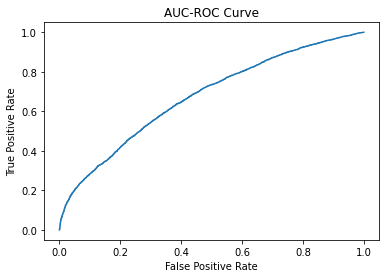

In [22]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

roc_auc_score(Y_test,pred)

In [23]:
#confusion matrix

confusion_matrix(Y_test,pred)

array([[3580, 2163],
       [2093, 3516]], dtype=int64)

In [24]:
#precision score

precision_score(Y_test,pred)

0.6191230850501849

In [25]:
#recall score

recall_score(Y_test,pred)

0.6268497058299162

In [26]:
f1_score(Y_test,pred)

0.622962437987243

# Decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

dtc.fit(X_train_final,Y_train)

DecisionTreeClassifier()

In [28]:
dtc_test_pred=dtc.predict(X_test_final)
dtc_train_pred=dtc.predict(X_train_final)


In [29]:
dtc_probas=dtc.predict_proba(X_test_final)
pos_probabs=dtc_probas[::,1]

In [30]:
#AUC-ROC curve
fpr,tpr,thresholds=roc_curve(Y_test,pos_probabs)

fpr,tpr,thresholds

(array([0.        , 0.43130768, 1.        ]),
 array([0.        , 0.56605456, 1.        ]),
 array([2., 1., 0.]))

0.5673734381328582

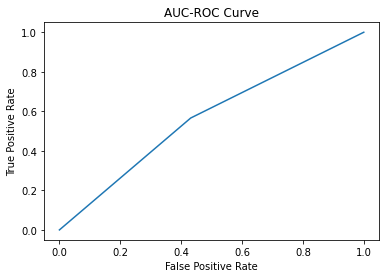

In [31]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

roc_auc_score(Y_test,dtc_test_pred)

In [32]:
#confusion matrix

confusion_matrix(Y_test,dtc_test_pred)

array([[3266, 2477],
       [2434, 3175]], dtype=int64)

In [33]:
#precision score

precision_score(Y_test,dtc_test_pred)

0.5617480537862704

In [34]:
#recall score

recall_score(Y_test,dtc_test_pred)

0.5660545551791764

In [35]:
f1_score(Y_test,dtc_test_pred)

0.5638930823195099

In [36]:
from sklearn.metrics import accuracy_score

print("Train accuracy :",accuracy_score(Y_train,dtc_train_pred))
print("Test accuracy :",accuracy_score(Y_test,dtc_test_pred))

Train accuracy : 1.0
Test accuracy : 0.5673890063424947


[Text(1045.6568243380682, 540.2025, 'X[1830] <= 0.5\ngini = 0.5\nsamples = 45404\nvalue = [22561, 22843]'),
 Text(755.4704450441558, 533.4075, 'X[3] <= -0.311\ngini = 0.497\nsamples = 39970\nvalue = [21515, 18455]'),
 Text(391.9551024098174, 526.6125000000001, 'X[26] <= -0.436\ngini = 0.5\nsamples = 27809\nvalue = [13683, 14126]'),
 Text(84.33013194938131, 519.8175, 'X[27] <= -1.04\ngini = 0.476\nsamples = 4557\nvalue = [2775, 1782]'),
 Text(14.281444180169597, 513.0225, 'X[27] <= -1.412\ngini = 0.391\nsamples = 907\nvalue = [665, 242]'),
 Text(4.4340544236293145, 506.2275, 'X[56] <= 0.5\ngini = 0.235\nsamples = 140\nvalue = [121, 19]'),
 Text(4.2006831381751395, 499.4325, 'X[15] <= 4.747\ngini = 0.216\nsamples = 138\nvalue = [121, 17]'),
 Text(3.733940567266791, 492.63750000000005, 'X[1733] <= 0.5\ngini = 0.198\nsamples = 135\nvalue = [120, 15]'),
 Text(3.5005692818126164, 485.84250000000003, 'X[964] <= 0.5\ngini = 0.187\nsamples = 134\nvalue = [120, 14]'),
 Text(3.267197996358442, 47

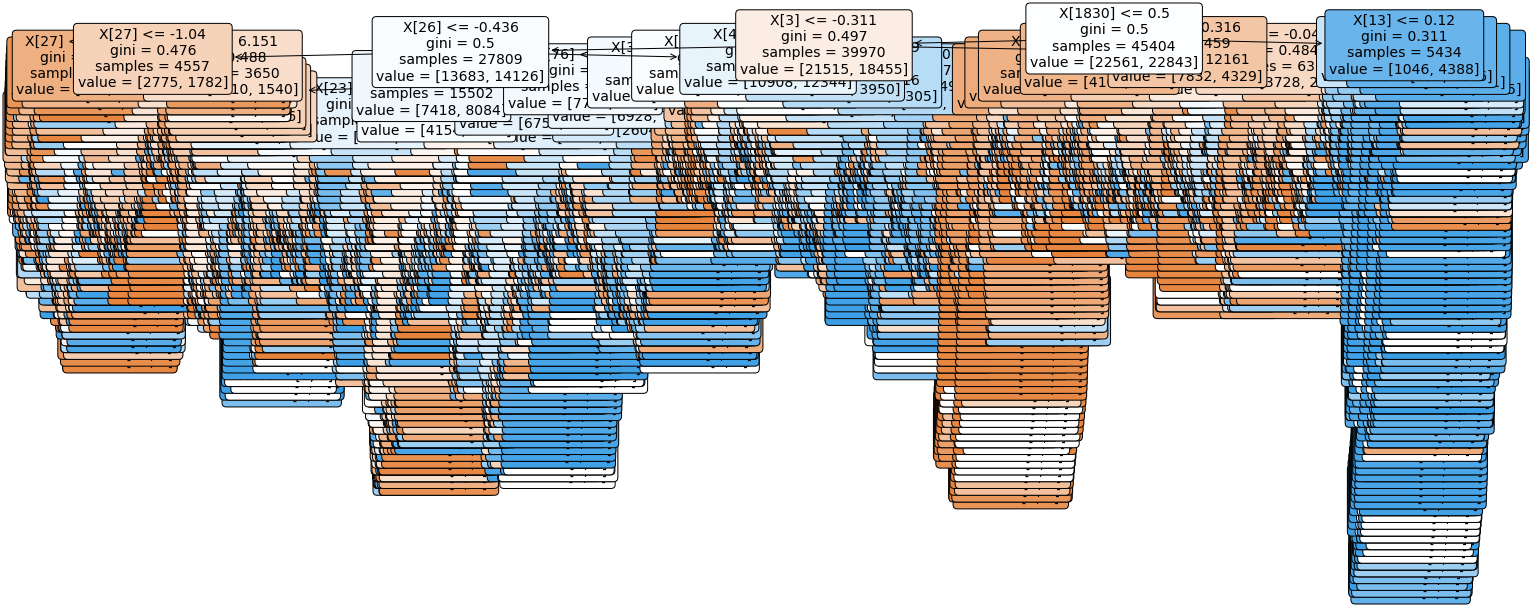

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(dtc,filled=True,rounded=True,fontsize=14)